# Interprétation de l'ACP

Pour approfondir l'interprétation de l'ACP, nous reprenons les données *Iris* du dernier TP.

In [1]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.mplot3d import proj3d
#from matplotlib.patches import FancyArrowPatch

Importons d'abord les données :

In [2]:
iris = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/irisdata.csv')
iris.head()

,sepal-long,sepal-larg,petal-long,petal-larg,espece
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.corr()

,sepal-long,sepal-larg,petal-long,petal-larg
sepal-long,1.000000,-0.109369,0.871754,0.817954
sepal-larg,-0.109369,1.000000,-0.420516,-0.356544
petal-long,0.871754,-0.420516,1.000000,0.962757
petal-larg,0.817954,-0.356544,0.962757,1.000000


Effectuons l'ACP :

In [3]:
from sklearn.decomposition import PCA

In [45]:
iris_pca = PCA() 
iris_res = iris_pca.fit_transform(iris.drop('espece',1))  
type(iris_res)

numpy.ndarray

# Visualisation des parts de variance expliquée
Dans ce TP nous voulons mieux comprendre  les résultats de l'ACP. Tout d'abord la part de la variance expliquée par les différentes composantes principales permet d'apprécier la qualité de la représentation des données par les premières composantes principales.

On peut visualiser la part de la variance expliquée par les composantes principales par les deux graphiques suivants.


<IPython.core.display.Javascript object>


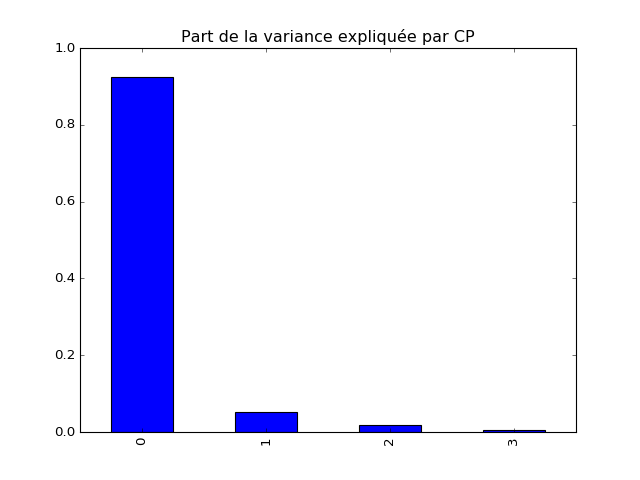

In [5]:
plt.figure()
scree = pd.Series(iris_pca.explained_variance_ratio_)
scree.plot(kind='bar', title=u"Part de la variance expliquée par CP")

<IPython.core.display.Javascript object>


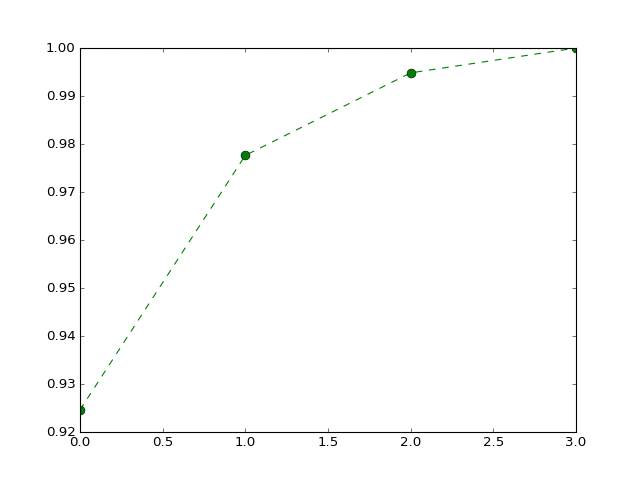

In [6]:
plt.figure()
cum = scree.cumsum()
plt.plot(range(cum.size),cum,'o--', markersize=8, color='green')
plt.plot(range(cum.size),np.ones(cum.size),':',  color='black')

## Question 1
Que peut-on lire sur les deux graphiques ci-dessus ? Interprétez.

# Analyse des nouvelles variables
Afin de comprendre les nouvelles variables obtenues par l'ACP on peut représenter les données projetées par un nuage des points (en dimension 2) et analyser individuellement certains points.

<IPython.core.display.Javascript object>


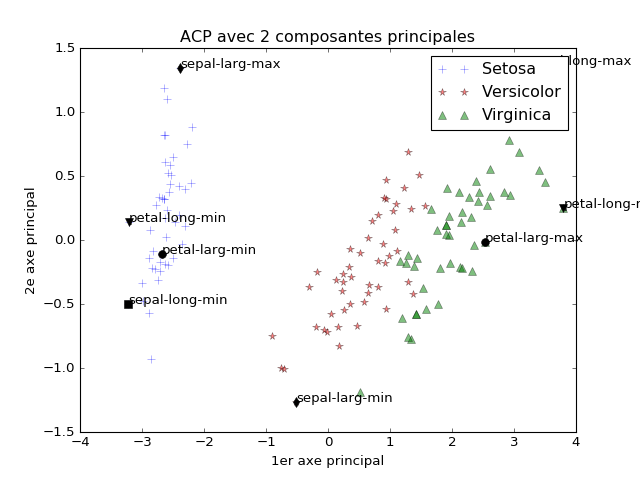

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(iris_res[0:49,0],iris_res[0:49,1], '+', markersize=7, color='blue', label='Setosa', alpha=0.5)
plt.plot(iris_res[50:99,0], iris_res[50:99,1], '*', markersize=7, color='red', label='Versicolor', alpha=0.5)
plt.plot(iris_res[100:149,0],iris_res[100:149,1], '^', markersize=7, color='green', label='Virginica', alpha=0.5)
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 2 composantes principales')
ind = iris['sepal-long'].argmax()
plt.plot(iris_res[ind,0],iris_res[ind,1],'s', markersize=7,color='black')
ax.text(iris_res[ind,0],iris_res[ind,1], 'sepal-long-max')
ind = iris['sepal-long'].argmin()
plt.plot(iris_res[ind,0],iris_res[ind,1],'s', markersize=7,color='black')
ax.text(iris_res[ind,0],iris_res[ind,1], 'sepal-long-min')
ind = iris['sepal-larg'].argmax()
plt.plot(iris_res[ind,0],iris_res[ind,1],'d', markersize=7,color='black')
ax.text(iris_res[ind,0],iris_res[ind,1], 'sepal-larg-max')
ind = iris['sepal-larg'].argmin()
plt.plot(iris_res[ind,0],iris_res[ind,1],'d', markersize=7,color='black')
ax.text(iris_res[ind,0],iris_res[ind,1], 'sepal-larg-min')
ind = iris['petal-long'].argmax()
plt.plot(iris_res[ind,0],iris_res[ind,1],'v', markersize=7,color='black')
ax.text(iris_res[ind,0],iris_res[ind,1], 'petal-long-max')
ind = iris['petal-long'].argmin()
plt.plot(iris_res[ind,0],iris_res[ind,1],'v', markersize=7,color='black')
ax.text(iris_res[ind,0],iris_res[ind,1], 'petal-long-min')
ind = iris['petal-larg'].argmax()
plt.plot(iris_res[ind,0],iris_res[ind,1],'o', markersize=7,color='black')
ax.text(iris_res[ind,0],iris_res[ind,1], 'petal-larg-max')
ind = iris['petal-larg'].argmin()
plt.plot(iris_res[ind,0],iris_res[ind,1],'o', markersize=7,color='black')
ax.text(iris_res[ind,0],iris_res[ind,1], 'petal-larg-min')

## Question 2
Comment interpréter le graphique ci-dessus ? Quelle est la realtion entre les variables intiales et les nouvelles variables ?

## Cercle des corrélations
Enfin pour mieux comprendre les nouvelles variables et leur relation avec les variables initiales, traçons le cercle des corrélations. Pour cela nous allons utiliser les deux fonctions suivantes (disponible sur le web) :

In [13]:
def myPCA(df):
	# Normalize data
	df_norm = (df - df.mean()) / df.std()
	# PCA
	pca = PCA()
	pca_res = pca.fit_transform(df_norm.values)
	# Ebouli
	ebouli = pd.Series(pca.explained_variance_ratio_)
	coef = np.transpose(pca.components_)
	cols = ['PC-'+str(x) for x in range(len(ebouli))]
	pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
	return pc_infos, ebouli  

def circleOfCorrelations(pc_infos, ebouli):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC-0"])):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-1"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")

<IPython.core.display.Javascript object>


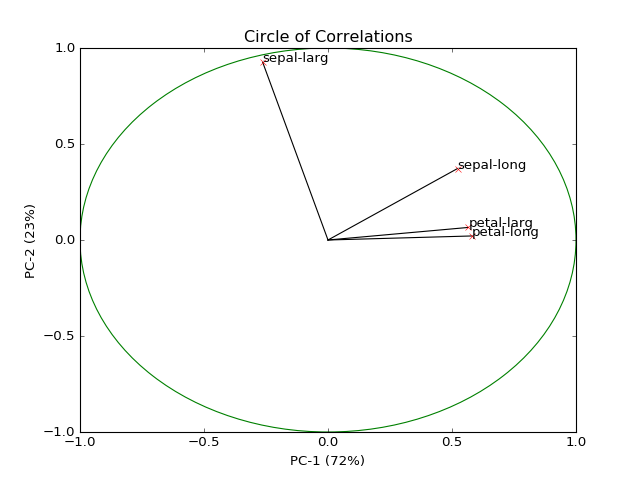

In [10]:
plt.figure()
pc_infos, ebouli = myPCA(iris.drop('espece',1))
circleOfCorrelations(pc_infos, ebouli)

## Question 3
Que lire sur le cercle des corrélations ? Comparer au graphique précédent.

# Exercice
Pour cet exercice nous travaillons avec des données météorologiques. Le fichier **meteo_mars.csv** contient les mesures de la pression moyenne (**PSTATM**), la température moyenne (**TMMOY**), la quantité de précipitations cumulées (**RR**) et la vitesse maximale du vent (**FXAB**) en mars 2016 pour différentes stations météorologiques en France. Le fichier **postes.csv** renseigne la position de ces stations en termes de latitude, longitude et altitude. Les données proviennent du site  https://donneespubliques.meteofrance.fr
1. Importer les deux tableaux de données avec la fonction **pd.read_csv** en utilisant l'option **index_col=0** afin d'utiliser la première colonne (qui est la même dans les deux  fichiers) comme **Index**. Ensuite, concaténer les deux tableaux avec la fonction **pd.concat**. Regarder l'aide pour comprendre son utilisation. Enfin, supprimer les lignes qui contiennent des **NaN**. Quelle est la taille du tableau final ?
2. Effectuer une ACP en omettant la variable **Altitude**. (On pourra utiliser **dataframe.drop()** comme dans l'exemple des données *Iris* afin de supprimer une colonne.)
3. Représenter graphiquement la part de variance expliquée par les différentes composantes principales. Commentez.
3. Tracer le nuage des points associé aux deux premières composantes principales. Indiquer  dans le graphique la valeur observée de l'**Altitude** pour certaines observations  (notammment pour les observations extrêmes). Interprétez.
4. Tracer le cercle des corrélations associé. Quelle est la relation entre les composantes prinicipales est les différentes variables initiales ?
5. Refaire une ACP en ajoutant la variable **Altitude**. Quel est l'impact de l'ajout de cette variable sur la part de variance expliquée par les différentes composantes principales ? Et sur  le cercle des corrélations associé ? Expliquez.

In [2]:
postes = pd.read_csv('C:/Users/jlmat_000/Documents/L3 Maths/3M248/postes.csv',sep=';',index_col=0)
postes.head()

,Nom,Latitude,Longitude,Altitude
7005,ABBEVILLE,50.136000,1.834000,69
7015,LILLE-LESQUIN,50.570000,3.097500,47
7020,PTE DE LA HAGUE,49.725167,-1.939833,6
7027,CAEN-CARPIQUET,49.180000,-0.456167,67
7037,ROUEN-BOOS,49.383000,1.181667,151


In [3]:
meteo_mars = pd.read_csv('C:/Users/jlmat_000/Documents/L3 Maths/3M248/meteo_mars.csv',sep=';',decimal=',',index_col=0)
meteo_mars.head()

,PSTATM,TMMOY,RR,FXAB
7005,1006.2,6.1,68.0,24.9
7015,1008.9,6.3,58.0,25.8
7020,1012.9,8.2,88.0,35.0
7027,1007.1,6.4,74.0,29.6
7037,996.5,6.0,76.0,23.9


In [4]:
meteo = pd.concat([postes,meteo_mars],axis=1)
meteo

,Nom,Latitude,Longitude,Altitude,PSTATM,TMMOY,RR,FXAB
7005,ABBEVILLE,50.136000,1.834000,69.0,1006.2,6.1,68.0,24.9
7015,LILLE-LESQUIN,50.570000,3.097500,47.0,1008.9,6.3,58.0,25.8
7020,PTE DE LA HAGUE,49.725167,-1.939833,6.0,1012.9,8.2,88.0,35.0
7027,CAEN-CARPIQUET,49.180000,-0.456167,67.0,1007.1,6.4,74.0,29.6
7037,ROUEN-BOOS,49.383000,1.181667,151.0,996.5,6.0,76.0,23.9
7072,REIMS-PRUNAY,49.209667,4.155333,95.0,1003.3,5.6,67.0,25.2
7110,BREST-GUIPAVAS,48.444167,-4.412000,94.0,1004.4,7.3,118.0,30.6
7117,PLOUMANAC'H,48.825833,-3.473167,55.0,1008.5,8.1,81.0,32.3
7130,RENNES-ST JACQUES,48.068833,-1.734000,36.0,1011.1,7.1,97.0,26.7
7139,ALENCON,48.445500,0.110167,143.0,997.7,6.1,93.0,26.7


In [37]:
meteo.shape

(59, 8)

In [7]:
meteo = meteo.dropna()
meteo.shape

(39, 8)

In [5]:
from sklearn.decomposition import PCA

In [6]:
sklearn_pca = PCA()
meteo_res = sklearn_pca.fit_transform(meteo.drop(['Altitude','Nom'],1))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<IPython.core.display.Javascript object>


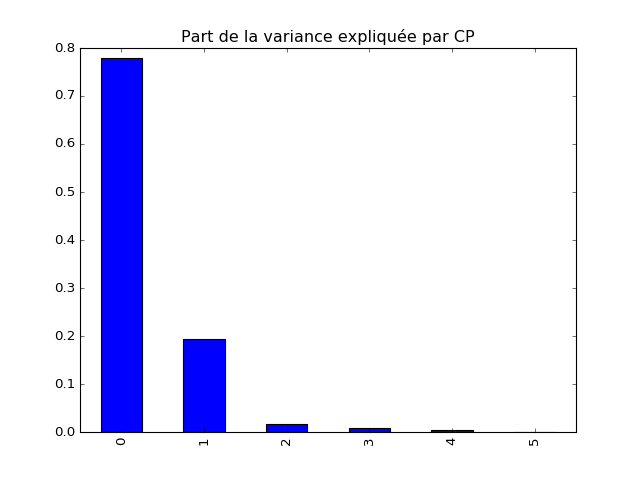

In [51]:
plt.figure()
scree = pd.Series(sklearn_pca.explained_variance_ratio_)
scree.plot(kind='bar', title=u"Part de la variance expliquée par CP")

<IPython.core.display.Javascript object>


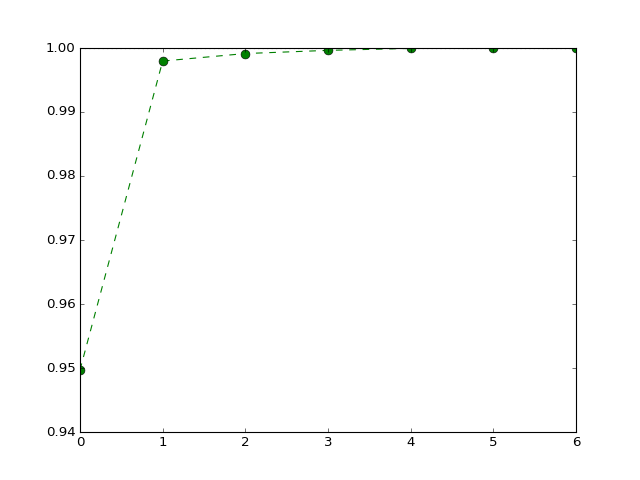

In [18]:
plt.figure()
cum = scree.cumsum()
plt.plot(range(cum.size),cum,'o--', markersize=8, color='green')
plt.plot(range(cum.size),np.ones(cum.size),':',  color='black')

<IPython.core.display.Javascript object>


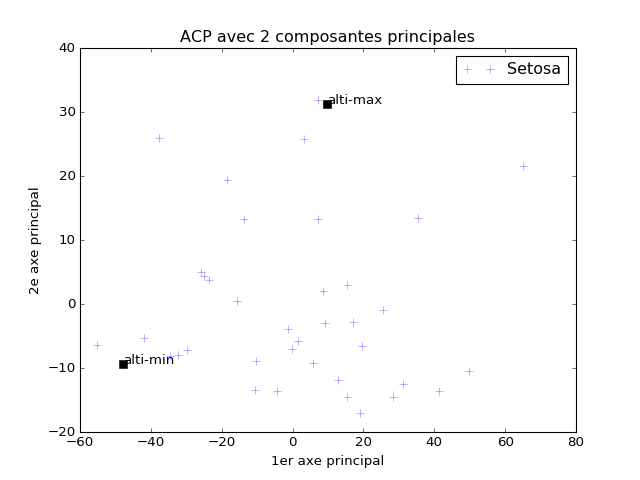

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(meteo_res[:,0],meteo_res[:,1], '+', markersize=7, color='blue', label='Setosa', alpha=0.5)
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 2 composantes principales')
ind = meteo.index.get_loc(meteo['Altitude'].argmax())
plt.plot(meteo_res[ind,0],meteo_res[ind,1],'s', markersize=7,color='black')
ax.text(meteo_res[ind,0],meteo_res[ind,1], 'alti-max')
ind = meteo.index.get_loc(meteo['Altitude'].argmin())
plt.plot(meteo_res[ind,0], meteo_res[ind,1],'s', markersize=7,color='black')
ax.text(meteo_res[ind,0],meteo_res[ind,1], 'alti-min')


<IPython.core.display.Javascript object>


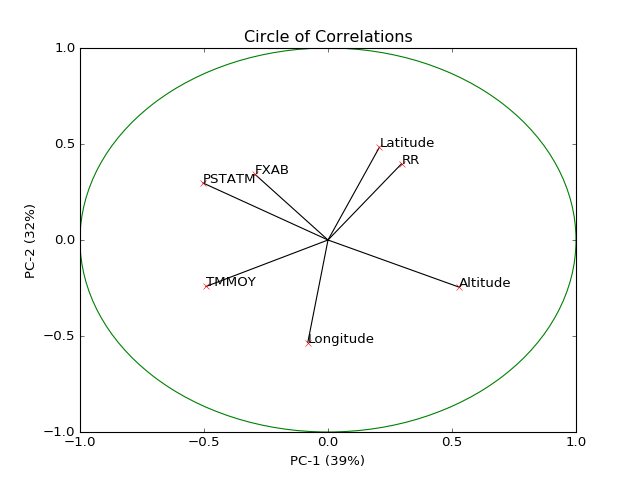

In [55]:
plt.figure()
pc_infos, ebouli = myPCA(meteo.drop('Nom',1))
circleOfCorrelations(pc_infos, ebouli)

In [9]:
meteo_res = sklearn_pca.fit_transform(meteo.drop(['Nom'],1))

<IPython.core.display.Javascript object>


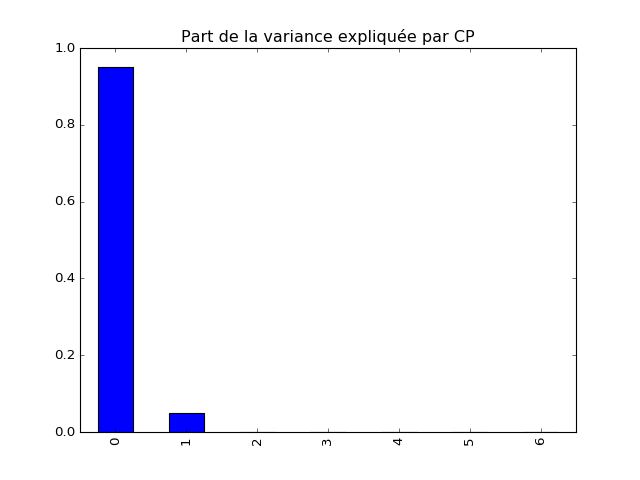

In [10]:
plt.figure()
scree = pd.Series(sklearn_pca.explained_variance_ratio_)
scree.plot(kind='bar', title=u"Part de la variance expliquée par CP")

<IPython.core.display.Javascript object>


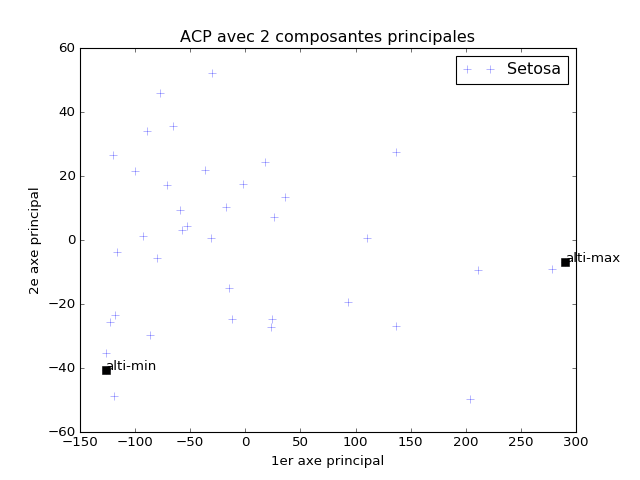

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(meteo_res[:,0],meteo_res[:,1], '+', markersize=7, color='blue', label='Setosa', alpha=0.5)
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 2 composantes principales')
ind = meteo.index.get_loc(meteo['Altitude'].argmax())
plt.plot(meteo_res[ind,0],meteo_res[ind,1],'s', markersize=7,color='black')
ax.text(meteo_res[ind,0],meteo_res[ind,1], 'alti-max')
ind = meteo.index.get_loc(meteo['Altitude'].argmin())
plt.plot(meteo_res[ind,0], meteo_res[ind,1],'s', markersize=7,color='black')
ax.text(meteo_res[ind,0],meteo_res[ind,1], 'alti-min')


<IPython.core.display.Javascript object>


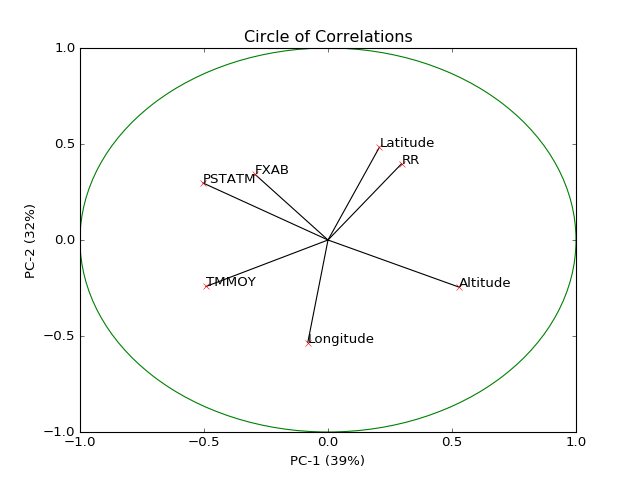

In [14]:
plt.figure()
pc_infos, ebouli = myPCA(meteo.drop('Nom',1))
circleOfCorrelations(pc_infos, ebouli)